# Analysing the large data set

First, we will get the spreadsheet data into the notebook. Each sheet will be an individual dataframe. We will load each one into the workbook and test to see all is good.

In [1]:
import pandas as pd #for data analysis
import numpy as np #for mathematical functions, matrix and linear algebra
import matplotlib.pyplot as plt #graphs
import seaborn as sns #graphs
import statsmodels.api as sm #qq plot function

xls = pd.ExcelFile('/Users/Scott/Max/Code/Wilkinson Max - Pearson Edexcel GCE AS and AL Mathematics data set - Issue 1 (1).xlsx')
camborne_1987 = pd.read_excel(xls, 'Camborne May-Oct 1987')
camborne_2015 = pd.read_excel(xls, 'Camborne May-Oct 2015')

heathrow_1987 = pd.read_excel(xls, 'Heathrow May-Oct 1987')
heathrow_2015 = pd.read_excel(xls, 'Heathrow May-Oct 2015')

hurn_1987 = pd.read_excel(xls, 'Hurn May-Oct 1987')
hurn_2015 = pd.read_excel(xls, 'Hurn May-Oct 2015')

leeming_1987 = pd.read_excel(xls, 'Leeming May-Oct 1987')
leeming_2015 = pd.read_excel(xls, 'Leeming May-Oct 2015')

leuchars_1987 = pd.read_excel(xls, 'Leuchars May-Oct 1987')
leuchars_2015 = pd.read_excel(xls, 'Leuchars May-Oct 2015')

beijing_1987 = pd.read_excel(xls, 'Beijing May-Oct 1987')
beijing_2015 = pd.read_excel(xls, 'Beijing May-Oct 2015')


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
camborne_1987.head()

,Date,Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900) (mm),Daily Total Sunshine (0000-2400) (hrs),Daily Mean Windspeed (0000-2400) (kn),Daily Mean Windspeed (0000-2400) (Beaufort conversion),Daily Maximum Gust (0000-2400) (kn),Daily Maximum Relative Humidity %,Daily Mean Total Cloud (oktas),Daily Mean Visibility (Dm),Daily Mean Pressure (hPa),Daily Mean Wind Direction (o),Cardinal Direction,Daily Max Gust Corresponding Direction (o),Cardinal Direction.1
0,1987-05-01,10.70,3.1,n/a,n/a,n/a,n/a,100,7,2000,1018.4250,360,N,20.0,NNE
1,1987-05-02,8.85,0.1,n/a,n/a,n/a,n/a,91,3,3200,1019.9250,320,NW,330.0,NNW
2,1987-05-03,8.10,0,n/a,n/a,n/a,n/a,77,5,3600,1028.5250,350,N,350.0,N
3,1987-05-04,8.20,0,n/a,n/a,n/a,n/a,83,5,4100,1035.6375,350,N,350.0,N
4,1987-05-05,9.75,0,n/a,n/a,n/a,n/a,86,5,2700,1035.6750,10,N,10.0,N


In [3]:
camborne_1987.describe()

,Daily Mean Temperature (0900-0900) (°C),Daily Maximum Relative Humidity %,Daily Mean Total Cloud (oktas),Daily Mean Visibility (Dm),Daily Mean Pressure (hPa),Daily Mean Wind Direction (o),Daily Max Gust Corresponding Direction (o)
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,176.000000
mean,13.265489,93.592391,5.652174,2470.108696,1015.912995,224.456522,227.784091
std,2.795418,5.959072,1.764463,1378.812346,8.575655,99.434072,102.266760
min,7.300000,69.000000,1.000000,0.000000,980.550000,10.000000,10.000000
25%,10.687500,91.000000,4.000000,1400.000000,1011.434375,170.000000,170.000000
50%,13.775000,95.000000,6.000000,2350.000000,1016.825000,225.000000,260.000000
75%,15.575000,98.000000,7.000000,3425.000000,1021.556250,310.000000,310.000000
max,18.850000,100.000000,8.000000,6300.000000,1035.675000,360.000000,360.000000


Great - the .xslx is now loaded as a dataframe. It looks like each one has 184 rows, with containing n/a. There are 176 rows that have data in that are non n/a type. Now we can clense the data.

## Clensing the data
I have decided to remove the rows which have n/a data, as they are incomplete. Since there are relativly few of them the overall effect is likley to be not siginficant. I have replaced the 'tr' entries with 0.01, we can't work with 'trace' amounts in statistical formulae, but not recording as 0 reflects the fact that there was rain on the day. This 0.01 value was chosen beacuse that is smaller than the minimum recorded value (0.1).

Now we apply this to the data. Unfortunatly, we can't just use a for loop and iterate over the whole list, since having a list of datafraes creates a locla copy present in the for loop. The main global copy would be unmodified. Instead, we apply a function to each dataframe.

In [4]:
def clense(df):
    df = df.replace(to_replace='tr', value=0.01) # replace tr with 0.01
    df = df.replace(to_replace='n/a', value=np.nan)    #replace n/a (formatted as string) with NaN
    df = df.dropna() #remove rows containing NaN type
    return df

camborne_1987 = clense(camborne_1987)
camborne_2015 = clense(camborne_2015)
heathrow_1987 = clense(heathrow_1987)
heathrow_2015 = clense(heathrow_2015)
hurn_1987 = clense(hurn_1987)
hurn_2015 = clense(hurn_2015)
leeming_1987 = clense(leeming_1987)
leeming_2015 = clense(leeming_2015)
leuchars_1987 = clense(leuchars_1987)
leuchars_2015 = clense(leuchars_2015)
beijing_1987 = clense(beijing_1987)
beijing_2015 = clense(beijing_2015)

dfs_list = [camborne_1987, camborne_2015, heathrow_1987, heathrow_2015,
           hurn_1987, hurn_2015, leeming_1987, leeming_2015,
           leuchars_1987, leuchars_2015] # List of all of the dataframes we are working with


In [5]:
#check to see that n/a has been reomved and that tr is now 0.01
camborne_1987.head()

,Date,Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900) (mm),Daily Total Sunshine (0000-2400) (hrs),Daily Mean Windspeed (0000-2400) (kn),Daily Mean Windspeed (0000-2400) (Beaufort conversion),Daily Maximum Gust (0000-2400) (kn),Daily Maximum Relative Humidity %,Daily Mean Total Cloud (oktas),Daily Mean Visibility (Dm),Daily Mean Pressure (hPa),Daily Mean Wind Direction (o),Cardinal Direction,Daily Max Gust Corresponding Direction (o),Cardinal Direction.1
13,1987-05-14,10.15,0.01,5.9,16.0,Moderate,35.0,95,7,3100,1007.7250,290,WNW,270.0,W
14,1987-05-15,9.55,0.00,12.3,13.0,Moderate,27.0,77,4,4500,1011.9125,10,N,10.0,N
15,1987-05-16,8.65,0.01,11.6,6.0,Light,16.0,92,4,3700,1015.4250,290,WNW,290.0,WNW
16,1987-05-17,9.65,0.01,0.0,7.0,Light,19.0,93,8,2900,1013.7250,300,WNW,250.0,WSW
17,1987-05-18,10.40,0.00,4.1,14.0,Moderate,27.0,86,6,2300,1015.2750,350,N,360.0,N


In [6]:
# Get the extreme values of all of the columns, to check that there are no values which are onviously wrong
for df in dfs_list:
    print(df.min())
    print(df.max())

Date                                                      1987-05-14 00:00:00
Daily Mean Temperature (0900-0900) (°C)                                  7.85
Daily Total Rainfall (0900-0900) (mm)                                       0
Daily Total Sunshine (0000-2400) (hrs)                                      0
Daily Mean Windspeed (0000-2400) (kn)                                       3
Daily Mean Windspeed (0000-2400) (Beaufort conversion)                  Fresh
Daily Maximum Gust (0000-2400) (kn)                                         9
Daily Maximum Relative Humidity %                                          69
Daily Mean Total Cloud (oktas)                                              2
Daily Mean Visibility (Dm)                                                  0
Daily Mean Pressure (hPa)                                             988.575
Daily Mean Wind Direction (o)                                              10
Cardinal Direction                                              

It now looks like the data is successfully cleaned. We can check that there are no obviously wrong values by scanning each dataset and printing the maximum values. Nothing seems untoward. Therefore, I am happy to analyse this data, confident that it is reliable.
## Sampling
Now we can take various samples from the data, to meaure the average rainfall. First, take a random sample. For the puroposes of this task, we will take a random sample, <b>without replacement</b>. This means that once a data point has been chosen, it can't be chosen again. 

To do this, we use the pandas sample function. This generates a list of all integers between 1 and the total number of rows in the data. Then, it generates a random number within the index range of this list and remove the value at that index. This continues until there are only 50 items left. The random_state ensures reproducibility.

In [7]:
sample_df = camborne_1987.sample(n=50, replace=False, random_state=100)
print("The mean after a simple random sample is: ", sample_df['Daily Total Rainfall (0900-0900) (mm)'].mean(),
     "mm/day")

The mean after a simple random sample is:  3.017199999999999 mm/day


For a systematic sample, there are 152 data points and we want 50 in the sample. Therefore we will take each 3rd value.

In [8]:
sample_df = camborne_1987

sample_df = sample_df.iloc[::3, :]
    
print("The mean after a systematic sample is: ", sample_df['Daily Total Rainfall (0900-0900) (mm)'].mean(),
     "mm/day")

The mean after a systematic sample is:  2.8021568627450986 mm/day


We can take a sample stratified by Beaufort Windspeed. This function takes the mean windspeed groups and applies a function to randmomly sample a proportion from these groups. This ensures a representitive sample by windspeed.

In [9]:
sample_df = camborne_1987.groupby('Daily Mean Windspeed (0000-2400) (Beaufort conversion)').apply(lambda x: x.sample(min(len(x), 22),random_state=100))
print("The mean after a stratified sample is: ", sample_df['Daily Total Rainfall (0900-0900) (mm)'].mean(),
     "mm/day")


The mean after a stratified sample is:  3.5502000000000002 mm/day


We will take a convenience sample. This is just the first 50 values for the rainfall.

In [10]:
sample_df = camborne_1987
sample_df = sample_df.iloc[:50]
print("The mean after a convenience sample is: ", sample_df['Daily Total Rainfall (0900-0900) (mm)'].mean(),
     "mm/day")

The mean after a convenience sample is:  2.189800000000001 mm/day


We can take the final sample, a quota sample. This divides the whole dataframe into mutually exclusive quotas and then takes the first few datapoints to make a sample. We will get quotas from the Mean Windspeed Beaufort conversion, as we did in the stratifed sample. (Todo - tidy this code up its really unpythonic)

In [11]:
# Calculate the quotas
quotas = list(camborne_1987['Daily Mean Windspeed (0000-2400) (Beaufort conversion)'].value_counts()) # number of items in each group
quotas = list(map(lambda x: int(x/3), quotas)) # Get the quota for each type

rainfall = []
sample_df = camborne_1987.groupby('Daily Mean Windspeed (0000-2400) (Beaufort conversion)') # get groups by windspeed
ix = 0

for n in sample_df:
    rainfall.append(list(n[1]['Daily Total Rainfall (0900-0900) (mm)'][:quotas[ix]]))
    ix += 1
    
print("The mean after a quota sample is: ", np.mean([rainfall[0] + rainfall[1] + rainfall[2]]),"mm/day")

The mean after a quota sample is:  3.72826086957 mm/day


Now we have these values, we can answer the question of the best estimate for mean rainfall during the period May-Oct 1987. This assumes that the time of year is correlated with amount of monthly rainfall, which is supported by existing knowledge and studies. The convenience sample is obviously flawed, we only get the first 50 days of rain data. Since May has different rainfall to the rest of the time series, this data is not representative of the whole time period. The same reasoning is true for the quota sample, since we took the first few values in each quota the start of the time period is better represented than the end of it. The stratified sample will give us representative data of the whole of the time series if the windspeed is correlated with rainfall. However, since we have not investigated this we should not assume this. Therefore, our final choice is between a random sample and systematic sample. A systematic sample guarantees that there will be representation equally over the whole time period, a random sample only suggests that this is likely. Therefore, I would use a systematic sample.

In [12]:
print("The true mean value is: ", camborne_1987['Daily Total Rainfall (0900-0900) (mm)'].mean(), "mm/day")

The true mean value is:  2.6621710526315794 mm/day


So it looks like our reasoning was correct!

## Grouped data
This task works with all of the UK data, so the first step to is merge all of the dataframes. Unfortunaly, pandas only allows for 1 merge at a time so we will work through all dataframes until we have a full merge. We can then very easily see the quartiles, mean and standard deviation for visability. We can visualise this with a histogram.

In [13]:
uk_2015 = camborne_2015.merge(heathrow_2015, how='outer')
uk_2015 = uk_2015.merge(hurn_2015, how='outer')
uk_2015 = uk_2015.merge(leeming_2015, how='outer')
uk_2015 = uk_2015.merge(leuchars_2015, how='outer')
uk_2015.describe()['Daily Mean Visibility (Dm)']

count     919.000000
mean     2348.639826
std       928.756167
min       200.000000
25%      1700.000000
50%      2300.000000
75%      3000.000000
max      4800.000000
Name: Daily Mean Visibility (Dm), dtype: float64

In [14]:
uk_2015.describe()

,Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900) (mm),Daily Total Sunshine (0000-2400) (hrs),Daily Mean Windspeed (0000-2400) (kn),Daily Maximum Gust (0000-2400) (kn),Daily Maximum Relative Humidity %,Daily Mean Total Cloud (oktas),Daily Mean Visibility (Dm),Daily Mean Pressure (hPa),Daily Mean Wind Direction (o),Daily Max Gust Corresponding Direction (o),Daily Maximum Relative Humidity %
count,919.000000,919.000000,919.000000,919.000000,919.000000,367.000000,919.000000,919.000000,919.000000,919.000000,919.000000,552.00000
mean,13.652285,2.194037,5.190098,8.242655,21.648531,94.493188,5.218716,2348.639826,1015.712384,210.293798,201.153428,93.15942
std,3.093360,4.999767,3.995839,3.288073,6.854342,4.391912,2.090814,928.756167,8.817500,92.619943,91.821185,6.61626
min,3.750000,0.000000,0.000000,2.000000,8.000000,74.000000,0.000000,200.000000,987.929167,10.000000,10.000000,65.00000
25%,11.650000,0.000000,1.550000,6.000000,17.000000,92.000000,4.000000,1700.000000,1010.789583,150.000000,130.000000,89.00000
50%,13.500000,0.200000,5.000000,8.000000,21.000000,95.000000,6.000000,2300.000000,1016.866667,230.000000,230.000000,95.00000
75%,15.600000,1.700000,8.300000,10.000000,25.000000,97.000000,7.000000,3000.000000,1021.306250,280.000000,270.000000,99.00000
max,28.700000,51.600000,15.900000,23.000000,52.000000,100.000000,8.000000,4800.000000,1038.154167,360.000000,360.000000,100.00000


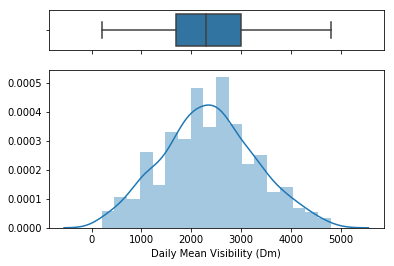

In [15]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})
 
# Add a graph in each part
sns.boxplot(uk_2015["Daily Mean Visibility (Dm)"], ax=ax_box)
sns.distplot(uk_2015["Daily Mean Visibility (Dm)"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

We can group the data by daily mean temperature. These groups will be: $$0<t\leq5, 5<t\leq10,  10<t\leq15,  15<t\leq20,  20<t\leq30.$$

In [16]:
bins = pd.cut(uk_2015['Daily Mean Temperature (0900-0900) (°C)'], [0, 5, 10, 15, 20, 30]) # get data by class

# get percentile of dataframe
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_


#get information on each group: frequency, total sum, mean, std dev
groups = uk_2015.groupby(bins)['Daily Mean Temperature (0900-0900) (°C)'].agg(['count', 'sum', 'mean', 
                                                                               'std', 'min', percentile(25), percentile(50), 
                                                                               percentile(75), 'max'])
groups

,count,sum,mean,std,min,percentile_25,percentile_50,percentile_75,max
Daily Mean Temperature (0900-0900) (°C),,,,,,,,,
"(0, 5]",4,16.35,4.087500,0.340037,3.75,3.90,4.025,4.2125,4.55
"(5, 10]",109,974.20,8.937615,1.030668,5.25,8.70,9.300,9.6500,10.00
"(10, 15]",521,6648.80,12.761612,1.326470,10.05,11.75,12.750,13.9000,15.00
"(15, 20]",268,4536.85,16.928545,1.336885,15.05,15.75,16.725,17.9000,20.00
"(20, 30]",17,370.25,21.779412,2.170258,20.10,20.35,20.700,22.5500,28.70


## Spread, outliers and skew
We will be comparing different years data for the following features: Mean Temperature, Visibility, Max Gust. The location will be Heathrow. We can first plot this relationship in a box plot, this will show the quartiles and outliers more than 1.5x IQR. Below we have a QQ plot, to show how 'normal' the data is. The more straight the line, the better the data fits a normal distribution.

### Mean Temperature

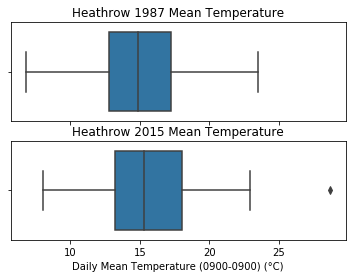

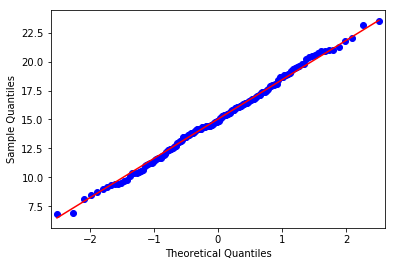

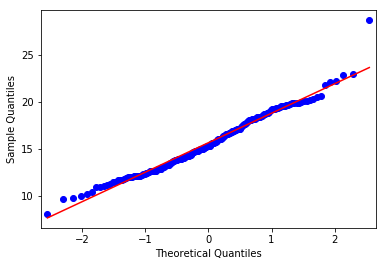

In [17]:
fig, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)})
 
# Add a graph in each part
sns.boxplot(heathrow_1987["Daily Mean Temperature (0900-0900) (°C)"], ax=ax_1).set_title('Heathrow 1987 Mean Temperature')
sns.boxplot(heathrow_2015["Daily Mean Temperature (0900-0900) (°C)"], ax=ax_2).set_title('Heathrow 2015 Mean Temperature')

ax_1.set(xlabel='')

sm.qqplot(heathrow_1987["Daily Mean Temperature (0900-0900) (°C)"], line='s')
sm.qqplot(heathrow_2015["Daily Mean Temperature (0900-0900) (°C)"], line='s')

plt.show()

Between 1987 and 2015, the range of observed temperature values has decreased, with the maximum and minimum moving closer together (except for one outlier in 2015). The median has increased slightly. The small nature of these changes suggests that they may not be statistically significant. The data almost perfectly fits a normal distribution, excluding outliers. 

### Mean visibility

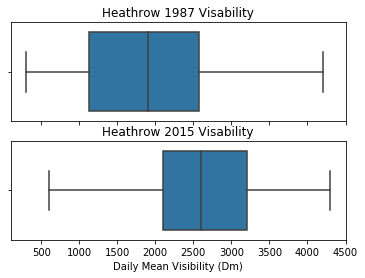

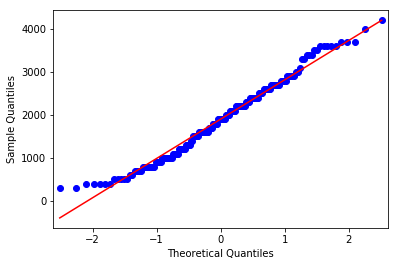

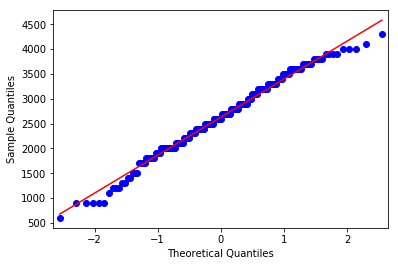

In [18]:
fig, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)})
 
# Add a graph in each part
sns.boxplot(heathrow_1987["Daily Mean Visibility (Dm)"], ax=ax_1).set_title('Heathrow 1987 Visability')
sns.boxplot(heathrow_2015["Daily Mean Visibility (Dm)"], ax=ax_2).set_title('Heathrow 2015 Visability')

ax_1.set(xlabel='')

sm.qqplot(heathrow_1987["Daily Mean Visibility (Dm)"], line='s')
sm.qqplot(heathrow_2015["Daily Mean Visibility (Dm)"], line='s')

plt.show()

The range for the visibility has stayed almost constant, but on average visibility has increased significantly. The 2015 Q1 is above the 1987 median and the 2015 median is above the 1987 Q3. This could be due to the reduced levels of particulates in the atmosphere around London during the period 1987-2015, since coal and other smoky fuels have been banned, and centeral heating has replaces the need for fires particulate matter has fallen and visibility increased. The data fits a normal distribution.

### Maximum gust

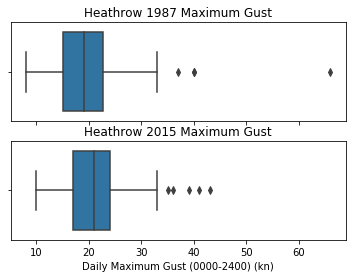

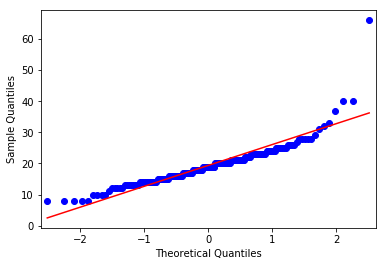

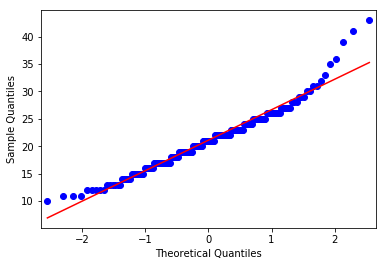

In [19]:
fig, (ax_1, ax_2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)})
 
# Add a graph in each part
sns.boxplot(heathrow_1987["Daily Maximum Gust (0000-2400) (kn)"], ax=ax_1).set_title('Heathrow 1987 Maximum Gust')
sns.boxplot(heathrow_2015["Daily Maximum Gust (0000-2400) (kn)"], ax=ax_2).set_title('Heathrow 2015 Maximum Gust')

ax_1.set(xlabel='')

sm.qqplot(heathrow_1987["Daily Maximum Gust (0000-2400) (kn)"], line='s')
sm.qqplot(heathrow_2015["Daily Maximum Gust (0000-2400) (kn)"], line='s')

plt.show()

The range of the maximum gust has remained relatively constant, with Q1,Q2 and Q3 increasingly slightly. This could be due to the increased aviation activity in the area. The data is normally distributed, except from the outliers.

## Correlation and Regression
We can take all of our numerical variable and run various correlation tests on them. I will identify correlations in the Camborne 2015 dataset. Below is a heatmap of the correlations and then a table of the numerical p values for each pair.

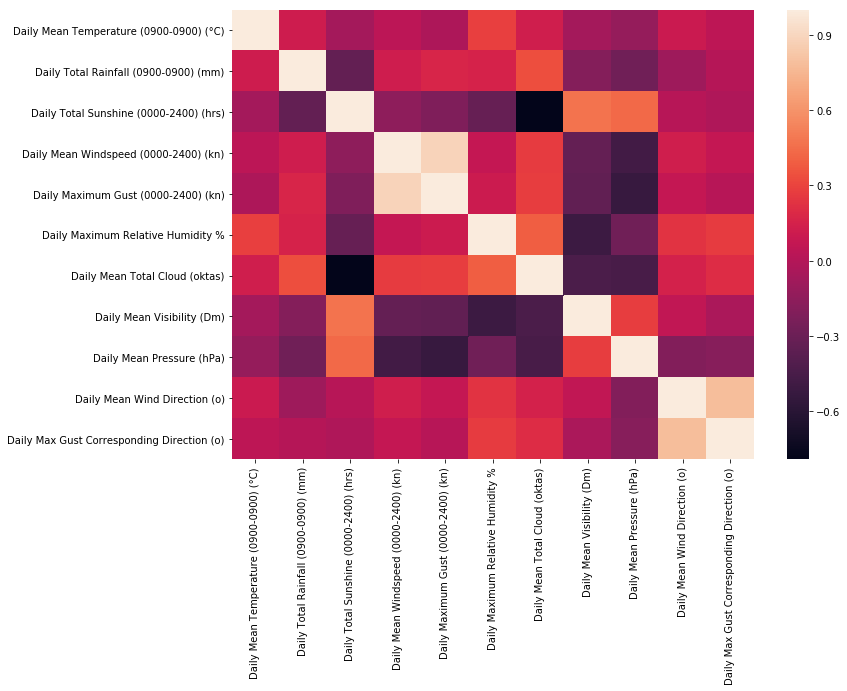

,Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900) (mm),Daily Total Sunshine (0000-2400) (hrs),Daily Mean Windspeed (0000-2400) (kn),Daily Maximum Gust (0000-2400) (kn),Daily Maximum Relative Humidity %,Daily Mean Total Cloud (oktas),Daily Mean Visibility (Dm),Daily Mean Pressure (hPa),Daily Mean Wind Direction (o),Daily Max Gust Corresponding Direction (o)
Daily Mean Temperature (0900-0900) (°C),1.000000,-0.011567,0.032960,0.074488,0.132527,0.040013,0.151682,0.075866,-0.115055,0.080334,0.244518
Daily Total Rainfall (0900-0900) (mm),-0.011567,1.000000,-0.160708,0.093232,0.100670,0.242355,0.202700,-0.259678,-0.216929,-0.266441,-0.218560
Daily Total Sunshine (0000-2400) (hrs),0.032960,-0.160708,1.000000,0.280974,0.235555,-0.095583,-0.817378,0.156383,0.172743,0.229734,0.208008
Daily Mean Windspeed (0000-2400) (kn),0.074488,0.093232,0.280974,1.000000,0.928128,-0.307347,-0.115590,0.092772,-0.399187,0.023900,0.318204
Daily Maximum Gust (0000-2400) (kn),0.132527,0.100670,0.235555,0.928128,1.000000,-0.288588,-0.085288,0.102002,-0.447423,0.052766,0.324861
Daily Maximum Relative Humidity %,0.040013,0.242355,-0.095583,-0.307347,-0.288588,1.000000,-0.019934,-0.462984,-0.056122,-0.194597,-0.236940
Daily Mean Total Cloud (oktas),0.151682,0.202700,-0.817378,-0.115590,-0.085288,-0.019934,1.000000,0.013537,-0.338797,-0.226370,-0.128362
Daily Mean Visibility (Dm),0.075866,-0.259678,0.156383,0.092772,0.102002,-0.462984,0.013537,1.000000,-0.055081,0.374700,0.324028
Daily Mean Pressure (hPa),-0.115055,-0.216929,0.172743,-0.399187,-0.447423,-0.056122,-0.338797,-0.055081,1.000000,0.109347,-0.107234
Daily Mean Wind Direction (o),0.080334,-0.266441,0.229734,0.023900,0.052766,-0.194597,-0.226370,0.374700,0.109347,1.000000,0.490441


In [20]:
fig, ax = plt.subplots()

# the size of A4 paper for the presentation slide
fig.set_size_inches(11.7, 8.27)
sns.heatmap(camborne_2015.corr())
plt.show()

df.corr()

The black and white are the values closest to p=-1 and p=1, where the negative or positive correlation is the strongest. Visibility and humidity have a negative correlation (p=-0.46). This is because humidity causes cloud cover which reduces Visibility. 

There is a positive correlation between the maximum humidity and the total rainfall (p=0.24). This is because at high humidities, the clouds can hold no more water and rain will fall. Hence, a high humidity can cause rainfall, so a positive correlation is expected. Interestingly, there was no correlation between mean temperature and total rainfall (p=-0.01).

However, this test, using the pearson correation coefficiant, only tests for linear relationships. A relationship such as $y\propto x^2$ or $y\propto 1/x$ would not show as a correlation. We can use the spearman rank test to see monotonic relationships. A heatmap and correlation matrix using the spearman correlations is below.

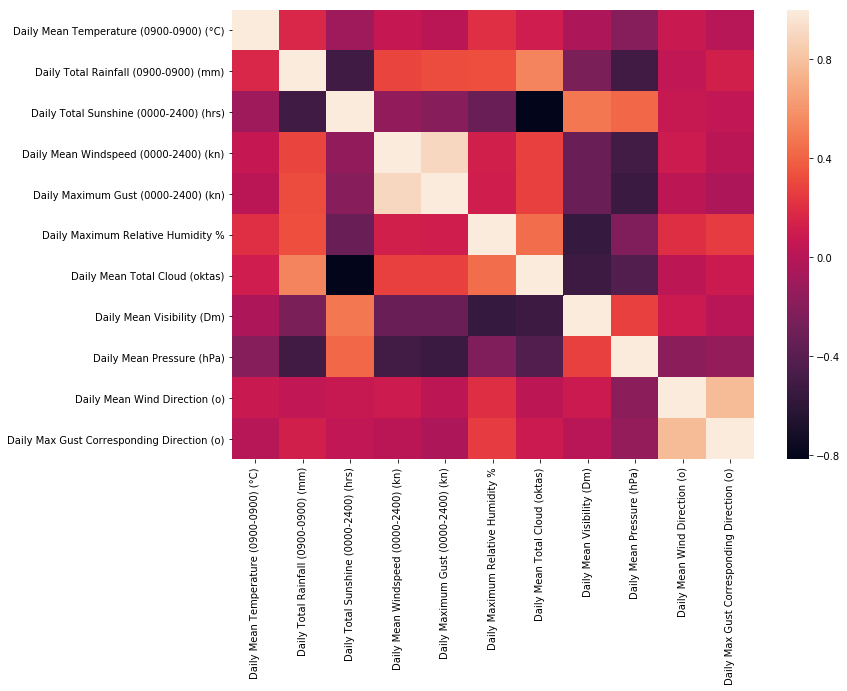

,Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900) (mm),Daily Total Sunshine (0000-2400) (hrs),Daily Mean Windspeed (0000-2400) (kn),Daily Maximum Gust (0000-2400) (kn),Daily Maximum Relative Humidity %,Daily Mean Total Cloud (oktas),Daily Mean Visibility (Dm),Daily Mean Pressure (hPa),Daily Mean Wind Direction (o),Daily Max Gust Corresponding Direction (o)
Daily Mean Temperature (0900-0900) (°C),1.000000,0.030255,0.022311,0.097009,0.147405,-0.035658,0.166427,0.087600,-0.150685,-0.000859,0.151037
Daily Total Rainfall (0900-0900) (mm),0.030255,1.000000,-0.251390,0.106439,0.142229,0.290448,0.308455,-0.252479,-0.358363,-0.308646,-0.211057
Daily Total Sunshine (0000-2400) (hrs),0.022311,-0.251390,1.000000,0.291094,0.250028,-0.120749,-0.833502,0.173539,0.122300,0.211639,0.264740
Daily Mean Windspeed (0000-2400) (kn),0.097009,0.106439,0.291094,1.000000,0.918846,-0.381092,-0.166129,0.147084,-0.411093,-0.166174,0.340983
Daily Maximum Gust (0000-2400) (kn),0.147405,0.142229,0.250028,0.918846,1.000000,-0.361677,-0.145924,0.138151,-0.459008,-0.138877,0.329748
Daily Maximum Relative Humidity %,-0.035658,0.290448,-0.120749,-0.381092,-0.361677,1.000000,-0.001332,-0.579872,0.012953,-0.051753,-0.336473
Daily Mean Total Cloud (oktas),0.166427,0.308455,-0.833502,-0.166129,-0.145924,-0.001332,1.000000,-0.017512,-0.250781,-0.191574,-0.173518
Daily Mean Visibility (Dm),0.087600,-0.252479,0.173539,0.147084,0.138151,-0.579872,-0.017512,1.000000,-0.046879,0.318994,0.349550
Daily Mean Pressure (hPa),-0.150685,-0.358363,0.122300,-0.411093,-0.459008,0.012953,-0.250781,-0.046879,1.000000,0.191450,-0.095501
Daily Mean Wind Direction (o),-0.000859,-0.308646,0.211639,-0.166174,-0.138877,-0.051753,-0.191574,0.318994,0.191450,1.000000,0.401922


In [21]:
fig, ax = plt.subplots()

# the size of A4 paper for the presentation slide
fig.set_size_inches(11.7, 8.27)
sns.heatmap(camborne_2015.corr(method='spearman'))
plt.show()

df.corr(method='spearman')

To see the difference between the two methods, we can subtract one matrix from another. This result should show the largest changes in the correltion coefficiant

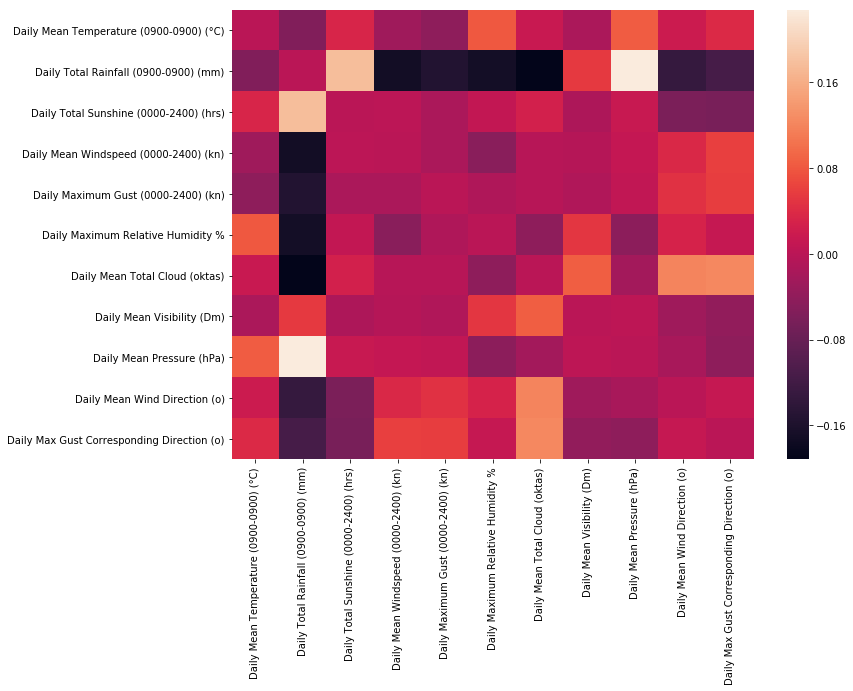

In [22]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.heatmap(camborne_2015.corr().sub(camborne_2015.corr(method='spearman')))
plt.show()

Correlations with rainfall seem to have changed dramatically. We can say that perhaps rainfall therefore correlates with many variables, just in a non linear way. We can now graph some of the correlations we discussed.

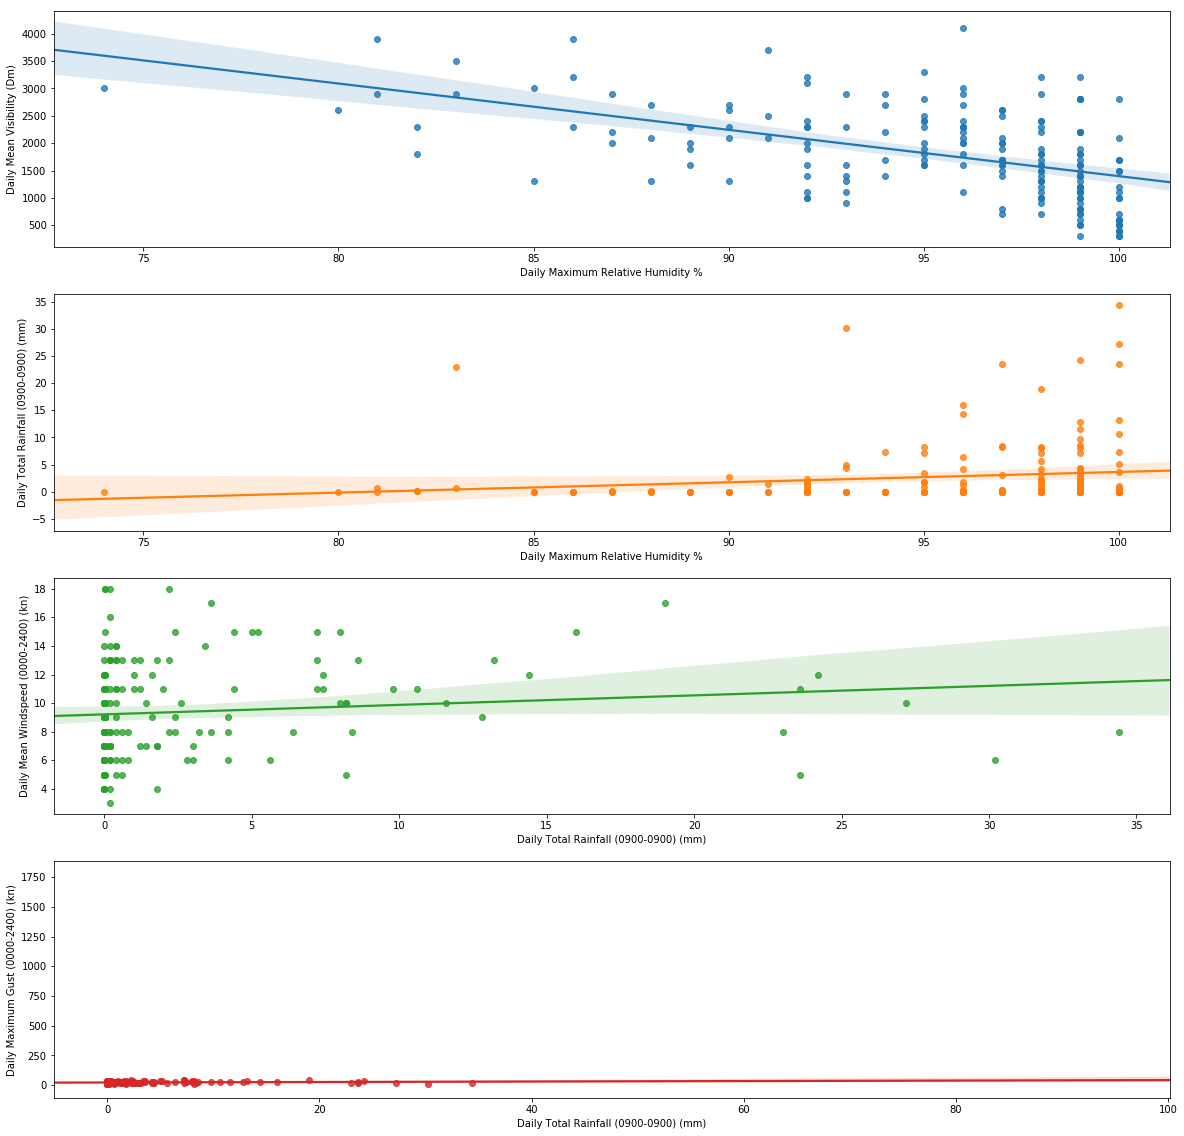

In [23]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(4, sharex=False)

fig.set_size_inches(20, 20)

sns.regplot(camborne_2015['Daily Maximum Relative Humidity %'], camborne_2015['Daily Mean Visibility (Dm)'], ax=ax_1)
sns.regplot(camborne_2015['Daily Maximum Relative Humidity %'], camborne_2015['Daily Total Rainfall (0900-0900) (mm)'], ax=ax_2)
sns.regplot(camborne_2015['Daily Total Rainfall (0900-0900) (mm)'], camborne_2015['Daily Mean Windspeed (0000-2400) (kn)'], ax=ax_3)
sns.regplot(camborne_2015['Daily Total Rainfall (0900-0900) (mm)'], camborne_2015['Daily Maximum Gust (0000-2400) (kn)'], ax=ax_4)

plt.show()

This visualisation is a good start, but there are lots of observations which share the same x value (relative humidity). To make the relationship clearer, we will collapse the data over discrete bins and plot a line instead. 

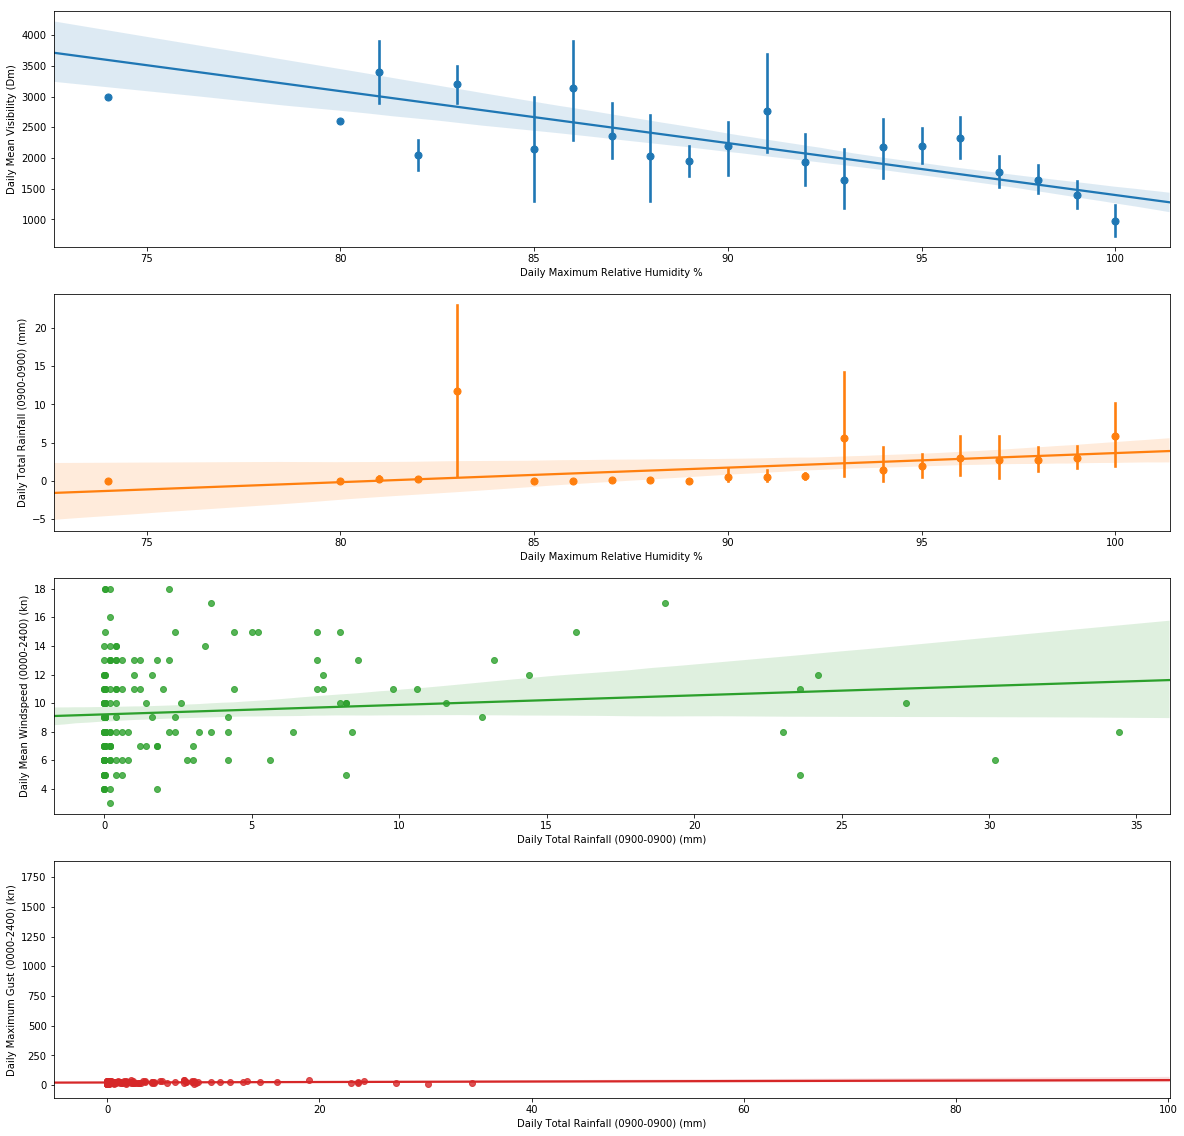

In [24]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(4, sharex=False)

fig.set_size_inches(20, 20)

sns.regplot(camborne_2015['Daily Maximum Relative Humidity %'], camborne_2015['Daily Mean Visibility (Dm)'], ax=ax_1, x_estimator=np.mean)
sns.regplot(camborne_2015['Daily Maximum Relative Humidity %'], camborne_2015['Daily Total Rainfall (0900-0900) (mm)'], ax=ax_2, x_estimator=np.mean)
sns.regplot(camborne_2015['Daily Total Rainfall (0900-0900) (mm)'], camborne_2015['Daily Mean Windspeed (0000-2400) (kn)'], ax=ax_3)
sns.regplot(camborne_2015['Daily Total Rainfall (0900-0900) (mm)'], camborne_2015['Daily Maximum Gust (0000-2400) (kn)'], ax=ax_4)

plt.show()

Much clearer! And these graphs backup what the correlation coefficiant told us, discussed above.

## Hypothesis Testing

We can use the data to test certain hypotheses. First, I will look at the rainfall and temperature in hurn in 1987 and then in 2015. We will test the hypothesis that climate change has affected weather patterns at the 10% significance level. Then, Bejing will be investigated.

First, let's look at the rainfall. We will calculate the change of rain by doing the days rained dived by days in the time period. Then we will use this to test weather there has been a statistically signifincant change in rainfall in 2015.

In [25]:
total_days = len(hurn_1987['Daily Total Rainfall (0900-0900) (mm)'])
days_of_rain = (hurn_1987['Daily Total Rainfall (0900-0900) (mm)'] !=0 ).sum()
chance = days_of_rain / total_days

print("There were ", total_days, "days in this period. It rained on ", days_of_rain, "days. The chance of rain is", chance)

There were  142 days in this period. It rained on  99 days. The chance of rain is 0.697183098592


Assume that there has been no change in weather patterns (H<sub>0</sub>). The chance of rain will be the same between 1987-2015. So if R is the variable of rain, $R \sim B(142, 0.70)$. We can test this for 2015 now.

In [26]:
total_days = len(hurn_2015['Daily Total Rainfall (0900-0900) (mm)'])
days_of_rain = (hurn_2015['Daily Total Rainfall (0900-0900) (mm)'] !=0 ).sum()
chance = days_of_rain / total_days

print("There were ", total_days, "days in this period. It rained on ", days_of_rain, "days.")

There were  184 days in this period. It rained on  117 days.


Assuming a 0.70% chance of rain, $P(R>x) = 0.9638$. Therefore we can reject H<sub>0</sub> and say that the weather has changed.

### Beijing
Now we can do the same for the rainfall in Beijing:

In [29]:
total_days = len(beijing_1987['Rainfall (24 hour total)'])
days_of_rain = (beijing_1987['Rainfall (24 hour total)'] !=0 ).sum()
chance = days_of_rain / total_days

print("There were ", total_days, "days in this period. It rained on ", 
      days_of_rain, "days. The chance of rain is", chance)

There were  184 days in this period. It rained on  52 days. The chance of rain is 0.282608695652


Assume that there has been no change in weather patterns (H<sub>0</sub>). The chance of rain will be the same between 1987-2015. So if R is the variable of rain, $R \sim B(184, 0.28)$. We can test this for 2015 now.

In [32]:
total_days = len(beijing_2015['Rainfall (24 hour total)'])
days_of_rain = (beijing_2015['Rainfall (24 hour total)'] !=0 ).sum()
chance = days_of_rain / total_days

print("There were ", total_days, "days in this period. It rained on ", days_of_rain, "days.")

There were  184 days in this period. It rained on  69 days.


Assuming a 0.28% chance of rain, $P(R<x) = 0.9967$. Therefore we can reject H<sub>0</sub> and say that the weather has changed.

### Hurn - Temparature

We will test the number of days above the average temperature and see if there has been a statistically signifincant change.

In [44]:
average_temperature = hurn_1987['Daily Mean Temperature (0900-0900) (°C)'].mean() 
total_days = len(hurn_1987['Daily Mean Temperature (0900-0900) (°C)'])
days_above_average = (hurn_1987['Daily Mean Temperature (0900-0900) (°C)'] > average_temperature).sum()
chance = days_above_average / total_days

print("There were ", total_days, "days in this period. The temperature was above average on ", 
      days_above_average, "days. The chance being above average is", chance)

There were  142 days in this period. The temperature was above average on  80 days. The chance being above average is 0.56338028169


Assume that there has been no change in weather patterns (H<sub>0</sub>). The chance a higher than average temperature will be the same between 1987-2015. So if T is the variable of temperature, $T \sim B(142, 0.56)$. We can test this for 2015 now.

In [45]:
total_days = len(hurn_2015['Daily Mean Temperature (0900-0900) (°C)'])
days_above_average = (hurn_2015['Daily Mean Temperature (0900-0900) (°C)'] > average_temperature).sum()
chance = days_above_average / total_days

print("There were ", total_days, "days in this period. The temperature was above average on ", 
      days_above_average, "days.")

There were  184 days in this period. The temperature was above average on  75 days.


Assuming a 0.56% chance of being above the 1987 average temperature, $P(T > x) = 0.0.9999$. So we can reject H<sub>0</sub>. The temperature has changed.

### Beijing Temperature


In [46]:
average_temperature = beijing_1987['Daily Mean Air Temperature'].mean() 
total_days = len(beijing_1987['Daily Mean Air Temperature'])
days_above_average = (beijing_1987['Daily Mean Air Temperature'] > average_temperature).sum()
chance = days_above_average / total_days

print("There were ", total_days, "days in this period. The temperature was above average on ", 
      days_above_average, "days. The chance being above average is", chance)

There were  184 days in this period. The temperature was above average on  112 days. The chance being above average is 0.608695652174


Assume that there has been no change in weather patterns (H<sub>0</sub>). The chance a higher than average temperature will be the same between 1987-2015. So if T is the variable of temperature, $T \sim B(184, 0.61)$. We can test this for 2015 now.

In [47]:
total_days = len(beijing_2015['Daily Mean Air Temperature'])
days_above_average = (beijing_2015['Daily Mean Air Temperature'] > average_temperature).sum()
chance = days_above_average / total_days

print("There were ", total_days, "days in this period. The temperature was above average on ", 
      days_above_average, "days.")

There were  184 days in this period. The temperature was above average on  119 days.


Assuming a 0.61% chance of being above average temperature, $P(T > x) = 0.1359$. So we can't reject H<sub>0</sub>. The temperature has not changed.

### Results
The results of these tests suggest that the climate is chaning. 3 out of the 4 tests indicated a statistically siginficant change in weather. This is concerning.